In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('G:/Stuff/car.csv')

In [3]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1729 non-null   object
 1   maint     1729 non-null   object
 2   doors     1729 non-null   object
 3   persons   1729 non-null   object
 4   lug_boot  1729 non-null   object
 5   safety    1729 non-null   object
 6   class     1729 non-null   object
dtypes: object(7)
memory usage: 94.7+ KB


In [5]:
df['doors'].value_counts()

5more    433
3        432
4        432
2        432
Name: doors, dtype: int64

In [6]:
df['persons'].value_counts()

more    577
4       576
2       576
Name: persons, dtype: int64

In [7]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      66
Name: class, dtype: int64

In [8]:
df.loc[df['doors']=='5more','doors']=5

In [9]:
df['doors'].value_counts()

5    433
3    432
4    432
2    432
Name: doors, dtype: int64

In [10]:
df.loc[df['persons']=='more','persons']=6

In [11]:
df['persons'].value_counts()

6    577
4    576
2    576
Name: persons, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1729 non-null   object
 1   maint     1729 non-null   object
 2   doors     1729 non-null   object
 3   persons   1729 non-null   object
 4   lug_boot  1729 non-null   object
 5   safety    1729 non-null   object
 6   class     1729 non-null   object
dtypes: object(7)
memory usage: 94.7+ KB


In [13]:
df['doors']=df['doors'].astype('int64')

In [14]:
df['persons']=df['persons'].astype('int64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1729 non-null   object
 1   maint     1729 non-null   object
 2   doors     1729 non-null   int64 
 3   persons   1729 non-null   int64 
 4   lug_boot  1729 non-null   object
 5   safety    1729 non-null   object
 6   class     1729 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.7+ KB


In [16]:
#df['doors']=df['doors'].fillna(0).astype('int64')

In [17]:
#df['persons']=df['persons'].fillna(0).astype('int64')

In [18]:
#df[df['doors']==0]

In [19]:
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


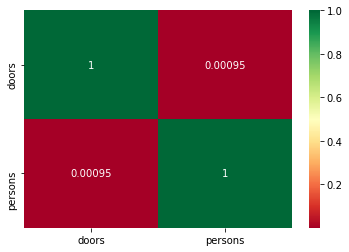

In [20]:
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

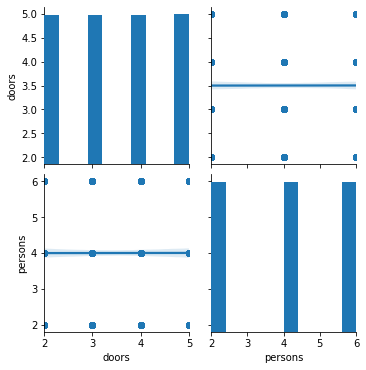

In [21]:
sns.pairplot(df,kind='reg')

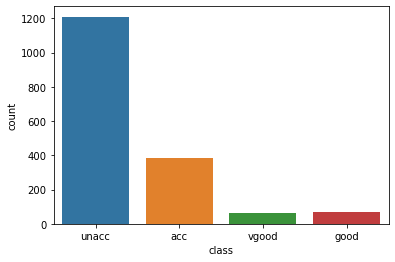

In [22]:
sns.countplot(x='class',data=df)

In [23]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      66
Name: class, dtype: int64

In [24]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [25]:
buying=pd.get_dummies(df['buying'],drop_first=True)
maint=pd.get_dummies(df['maint'],drop_first=True)
lug_boot=pd.get_dummies(df['lug_boot'],drop_first=True)
safety=pd.get_dummies(df['safety'],drop_first=True)

In [26]:
buying.rename(columns={'low':'low_buying','med':'med_buying','vhigh':'vhigh_buying'},inplace=True)

In [27]:
maint.rename(columns={'low':'low_maint','med':'med_maint','vhigh':'vhigh_maint'},inplace=True)

In [28]:
lug_boot.rename(columns={'med':'med_lug','small':'small_lug'},inplace=True)

In [29]:
safety.rename(columns={'low':'low_safety','med':'med_safety'},inplace=True)

In [30]:
df1=df.drop(['buying', 'maint','lug_boot', 'safety'],axis=1)

In [33]:
df1=pd.concat([df1,buying,maint,lug_boot,safety],axis=1)

In [34]:
df1.head()

,doors,persons,class,low_buying,med_buying,vhigh_buying,low_maint,med_maint,vhigh_maint,med_lug,small_lug,low_safety,med_safety
0,2,2,unacc,0,0,1,0,0,1,0,1,1,0
1,2,2,unacc,0,0,1,0,0,1,0,1,0,1
2,2,2,unacc,0,0,1,0,0,1,0,1,0,0
3,2,2,unacc,0,0,1,0,0,1,1,0,1,0
4,2,2,unacc,0,0,1,0,0,1,1,0,0,1


In [35]:
df1.shape

(1729, 13)

In [36]:
df1['class']=df1['class'].astype('category')

In [37]:
df1['Class']=df1['class'].cat.codes

In [39]:
df1.drop('class',axis=1,inplace=True)

In [41]:
data=df1.drop('Class',axis=1)
target=df1['Class']

In [42]:
data.shape,target.shape

((1729, 12), (1729,))

In [43]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(data,target,random_state=30,test_size=0.25)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [76]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
XGB=XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

### Accuracy for Test data

In [79]:
LR.score(x_test,y_test)*100

83.60277136258661

In [80]:
RF.score(x_test,y_test)*100

95.84295612009238

In [81]:
XGB.score(x_test,y_test)*100

99.30715935334872

### Accuracy for Train data

In [82]:
LR.score(x_train,y_train)*100

85.10802469135803

In [83]:
RF.score(x_train,y_train)*100

100.0

In [84]:
XGB.score(x_train,y_train)*100

100.0

In [85]:
y_pred_LR=LR.predict(x_test)
y_pred_RF=RF.predict(x_test)
y_pred_XGB=XGB.predict(x_test)

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [87]:
confusion_matrix(y_test,y_pred_LR)

array([[ 61,   1,  23,   1],
       [ 11,   8,   0,   2],
       [ 28,   0, 278,   0],
       [  5,   0,   0,  15]], dtype=int64)

In [88]:
confusion_matrix(y_test,y_pred_RF)

array([[ 83,   0,   3,   0],
       [  1,  17,   1,   2],
       [  7,   1, 298,   0],
       [  0,   3,   0,  17]], dtype=int64)

In [89]:
confusion_matrix(y_test,y_pred_XGB)

array([[ 86,   0,   0,   0],
       [  1,  20,   0,   0],
       [  1,   1, 304,   0],
       [  0,   0,   0,  20]], dtype=int64)

In [90]:
print(classification_report(y_test,y_pred_XGB))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        86
           1       0.95      0.95      0.95        21
           2       1.00      0.99      1.00       306
           3       1.00      1.00      1.00        20

    accuracy                           0.99       433
   macro avg       0.98      0.99      0.98       433
weighted avg       0.99      0.99      0.99       433



In [91]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.58      0.71      0.64        86
           1       0.89      0.38      0.53        21
           2       0.92      0.91      0.92       306
           3       0.83      0.75      0.79        20

    accuracy                           0.84       433
   macro avg       0.81      0.69      0.72       433
weighted avg       0.85      0.84      0.84       433



In [93]:
from sklearn.externals import joblib

In [94]:
joblib.dump(XGB,'G:/Stuff/car.pkl')

['G:/Stuff/car.pkl']

In [95]:
car_DSmodel =joblib.load('G:/Stuff/car.pkl')

In [99]:
df['class'].tail(5)

1724    vgood
1725    unacc
1726     good
1727    vgood
1728    vgood
Name: class, dtype: object

In [98]:
df1['Class'].tail(5)

1724    3
1725    2
1726    1
1727    3
1728    3
Name: Class, dtype: int8